In [ ]:
#Dina Pinchuck 
#this part of the project uses transfer learning and VGG

First i downloaded the zip of pictures and seperated each category maunally and split it 70 -30 : 70% of each category for training and 30% for testing

---

why i chose to split the data 70/30
https://www.researchgate.net/post/Is-there-an-ideal-ratio-between-a-training-set-and-validation-set-Which-trade-off-would-you-suggest


In [ ]:
!gdown --id 1UYZwlIuFdP37kpFXFFQ9RzHSuVfOLdv3 #downloading the file from google drive
#https://drive.google.com/file/d/1UYZwlIuFdP37kpFXFFQ9RzHSuVfOLdv3/view?usp=sharing
import os
import zipfile
!unzip image_data.zip #unzipping the file so it can be used

Downloading...
From: https://drive.google.com/uc?id=1UYZwlIuFdP37kpFXFFQ9RzHSuVfOLdv3
To: /content/image_data.zip
95.7MB [00:02, 44.1MB/s]
Archive:  image_data.zip
   creating: test/cloudy/
  inflating: test/cloudy/cloudy211.jpg  
  inflating: test/cloudy/cloudy212.jpg  
  inflating: test/cloudy/cloudy213.jpg  
  inflating: test/cloudy/cloudy214.jpg  
  inflating: test/cloudy/cloudy215.jpg  
  inflating: test/cloudy/cloudy216.jpg  
  inflating: test/cloudy/cloudy217.jpg  
  inflating: test/cloudy/cloudy218.jpg  
  inflating: test/cloudy/cloudy219.jpg  
  inflating: test/cloudy/cloudy220.jpg  
  inflating: test/cloudy/cloudy221.jpg  
  inflating: test/cloudy/cloudy222.jpg  
  inflating: test/cloudy/cloudy223.jpg  
  inflating: test/cloudy/cloudy224.jpg  
  inflating: test/cloudy/cloudy225.jpg  
  inflating: test/cloudy/cloudy226.jpg  
  inflating: test/cloudy/cloudy227.jpg  
  inflating: test/cloudy/cloudy228.jpg  
  inflating: test/cloudy/cloudy229.jpg  
  inflating: test/cloudy/cloudy

In [ ]:

train_dir ='/content/train'
validation_dir = '/content/test'

# Directory with our training cloudy pictures
train_cloudy_dir = os.path.join(train_dir, 'cloudy')

# Directory with our training rain pictures
train_rain_dir = os.path.join(train_dir, 'rain')


# Directory with our training shine pictures
train_shine_dir = os.path.join(train_dir, 'shine')

# Directory with our training sunrise pictures
train_sunrise_dir = os.path.join(train_dir, 'sunrise')


# Directory with our validation cloudy pictures
validation_cloudy_dir = os.path.join(validation_dir, 'cloudy')

# Directory with our validation rain pictures
validation_rain_dir = os.path.join(validation_dir, 'rain')


# Directory with our validation shine pictures
validation_shine_dir = os.path.join(validation_dir, 'shine')

# Directory with our validation sunrise pictures
validation_sunrise_dir = os.path.join(validation_dir, 'sunrise')

#printing sizes of each category of training images
print('total training cloudy images:', len(os.listdir(train_cloudy_dir)))
print('total training rain images:', len(os.listdir(train_rain_dir)))
print('total training shine images:', len(os.listdir(train_shine_dir)))
print('total training sunrise images:', len(os.listdir(train_sunrise_dir)))

#printing sizes of each category of validation images
print('total validation cloudy images:', len(os.listdir(validation_cloudy_dir)))
print('total validation rain images:', len(os.listdir(validation_rain_dir)))
print('total validation shine images:', len(os.listdir(validation_shine_dir)))
print('total validation sunrise images:', len(os.listdir(validation_sunrise_dir)))

total training cloudy images: 210
total training rain images: 150
total training shine images: 177
total training sunrise images: 250
total validation cloudy images: 90
total validation rain images: 65
total validation shine images: 76
total validation sunrise images: 107


In [ ]:
#imports needed for building a model and plotting graphs
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD, RMSprop
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Building the first model like in assignment 5

In [ ]:
model1 = VGG16(include_top=False, input_shape=(224, 224, 3)) #the VGG model
	# mark loaded layers as not trainable
for layer in model1.layers:
  layer.trainable = False
	# add new classifier layers
flat1 = Flatten()(model1.layers[-1].output)
dropout1=Dropout(0.5)(flat1)
class1 = Dense(8, activation='relu', kernel_initializer='he_uniform')(dropout1)
output1 = Dense(4, activation='sigmoid')(class1) #output layer
# define new model
model1 = Model(inputs=model1.inputs, outputs=output1)

58900480/58889256 [==============================] - 1s 0us/step


Generators for training and validation data

In [ ]:
# data augmentation on the training data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,)

# rescaling validation data - augmentation isn't done to the testing data
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=8,
        # Since we have more than two types of pictures the class mode is categorical
        class_mode='categorical')

# Flow validation images in batches of 32 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical')

Found 787 images belonging to 4 classes.
Found 338 images belonging to 4 classes.


compiling and running the first model 

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=98,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=42,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
98/98 - 48s - loss: 1.3124 - acc: 0.3928 - val_loss: 1.3907 - val_acc: 0.3810
Epoch 2/10
98/98 - 16s - loss: 1.1188 - acc: 0.4827 - val_loss: 1.0672 - val_acc: 0.5179
Epoch 3/10
98/98 - 16s - loss: 1.0693 - acc: 0.4994 - val_loss: 1.0103 - val_acc: 0.4524
Epoch 4/10
98/98 - 16s - loss: 1.0285 - acc: 0.5135 - val_loss: 1.0303 - val_acc: 0.5685
Epoch 5/10
98/98 - 16s - loss: 1.0010 - acc: 0.5302 - val_loss: 0.9350 - val_acc: 0.5476
Epoch 6/10
98/98 - 16s - loss: 0.9731 - acc: 0.5315 - val_loss: 0.9280 - val_acc: 0.5417
Epoch 7/10
98/98 - 16s - loss: 0.9743 - acc: 0.5430 - val_loss: 1.0108 - val_acc: 0.4702
Epoch 8/10
98/98 - 16s - loss: 0.9424 - acc: 0.5571 - val_loss: 0.9550 - val_acc: 0.5000
Epoch 9/10
98/98 - 16s - loss: 0.9450 - acc: 0.5546 - val_loss: 0.9398 - val_acc: 0.5268
Epoch 10/10
98/98 - 16s - loss: 0.9102 - acc: 0.5712 - val_loss: 0.9970 - val_acc: 0.4970


printing graphs for the first model

43/43 - 3s - loss: 0.9945 - acc: 0.4970
Test loss: 0.9944878816604614
Test accuracy: 0.4970414340496063


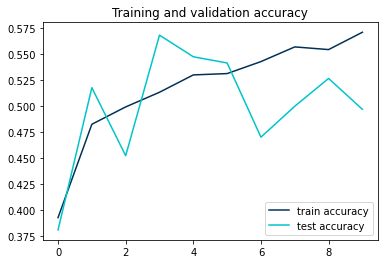

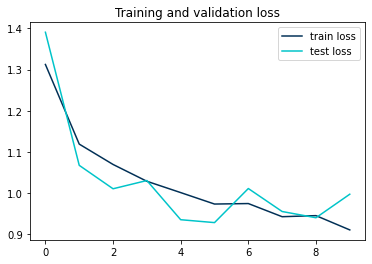

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

# Get number of epochs
epochs = range(len(acc1))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc1,label="train accuracy",color='#013056')
plt.plot(epochs, val_acc1,label="test accuracy",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss1,label="train loss",color='#013056')
plt.plot(epochs, val_loss1,label="test loss",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation loss')

#checking the accuracy and loss
score = model1.evaluate(validation_generator, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Second model using softmax and more filters

In [ ]:
model2 = VGG16(include_top=False, input_shape=(224, 224, 3)) #the VGG model
	# mark loaded layers as not trainable
for layer in model2.layers:
		layer.trainable = False
	# add new classifier layers
flat2= Flatten()(model2.layers[-1].output)
class2 = Dropout(0.5)(flat2)
output2 = Dense(4, activation='softmax')(class2) #output layer
	# define new model
model2 = Model(inputs=model2.inputs, outputs=output2)

Running the second model

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=98,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=42,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
98/98 - 17s - loss: 0.8154 - acc: 0.6958 - val_loss: 0.3272 - val_acc: 0.8958
Epoch 2/10
98/98 - 16s - loss: 0.3464 - acc: 0.8806 - val_loss: 0.2496 - val_acc: 0.9077
Epoch 3/10
98/98 - 16s - loss: 0.3134 - acc: 0.8768 - val_loss: 0.2981 - val_acc: 0.8988
Epoch 4/10
98/98 - 16s - loss: 0.2950 - acc: 0.8858 - val_loss: 0.3207 - val_acc: 0.9137
Epoch 5/10
98/98 - 16s - loss: 0.2391 - acc: 0.9230 - val_loss: 0.1963 - val_acc: 0.9315
Epoch 6/10
98/98 - 16s - loss: 0.2227 - acc: 0.9230 - val_loss: 0.2256 - val_acc: 0.9375
Epoch 7/10
98/98 - 16s - loss: 0.2155 - acc: 0.9345 - val_loss: 0.1808 - val_acc: 0.9464
Epoch 8/10
98/98 - 16s - loss: 0.2107 - acc: 0.9243 - val_loss: 0.2314 - val_acc: 0.9464
Epoch 9/10
98/98 - 16s - loss: 0.1260 - acc: 0.9474 - val_loss: 0.2604 - val_acc: 0.9137
Epoch 10/10
98/98 - 16s - loss: 0.2385 - acc: 0.9217 - val_loss: 0.4995 - val_acc: 0.8810


Graphing the softmax model results

43/43 - 2s - loss: 0.4966 - acc: 0.8817
Test loss: 0.4965914785861969
Test accuracy: 0.88165682554245


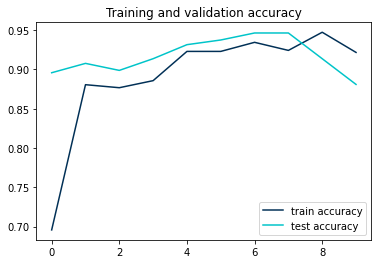

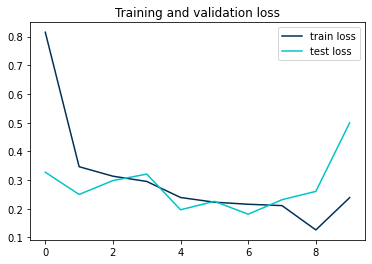

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

# Get number of epochs
epochs = range(len(acc2))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc2,label="train accuracy",color='#013056')
plt.plot(epochs, val_acc2,label="test accuracy",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss2,label="train loss",color='#013056')
plt.plot(epochs, val_loss2,label="test loss",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation loss')

#checking the accuracy and loss
score = model2.evaluate(validation_generator, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

model with accuracy over 95%

In [ ]:
model3 = VGG16(include_top=False, input_shape=(224, 224, 3)) #the VGG model
# mark loaded layers as not trainable
for layer in model3.layers:
  layer.trainable = False
# add new classifier layers
flat3 = Flatten()(model3.layers[-1].output)
class3 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat3)
output3 = Dense(4, activation='sigmoid')(class3) #output layer
# define new model
model3 = Model(inputs=model3.inputs, outputs=output3)

Compiling the model with the SGD optimizer

In [ ]:
#compling the model with SGD optimizer
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Recreating the data generators because we don't need augmentation for this model.

In [ ]:

#data isnt rescaled - this helps us get better results
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

# Flow training images using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=8, #updated batch size
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images  using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=8, 
        class_mode='categorical')

Found 787 images belonging to 4 classes.
Found 338 images belonging to 4 classes.


In [ ]:
#running the model
history3 = model3.fit_generator(
      train_generator,
      steps_per_epoch=len(train_generator),  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=len(validation_generator),  
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
99/99 - 10s - loss: 0.0027 - acc: 0.9987 - val_loss: 1.1056 - val_acc: 0.9675
Epoch 2/10
99/99 - 9s - loss: 0.0095 - acc: 0.9987 - val_loss: 1.1481 - val_acc: 0.9615
Epoch 3/10
99/99 - 10s - loss: 5.2804e-05 - acc: 1.0000 - val_loss: 1.1673 - val_acc: 0.9586
Epoch 4/10
99/99 - 9s - loss: 2.4387e-08 - acc: 1.0000 - val_loss: 1.1635 - val_acc: 0.9586
Epoch 5/10
99/99 - 9s - loss: 2.4084e-08 - acc: 1.0000 - val_loss: 1.1635 - val_acc: 0.9586
Epoch 6/10
99/99 - 9s - loss: 2.3781e-08 - acc: 1.0000 - val_loss: 1.1635 - val_acc: 0.9586
Epoch 7/10
99/99 - 9s - loss: 2.3630e-08 - acc: 1.0000 - val_loss: 1.1635 - val_acc: 0.9586
Epoch 8/10
99/99 - 9s - loss: 2.3327e-08 - acc: 1.0000 - val_loss: 1.1635 - val_acc: 0.9586
Epoch 9/10
99/99 - 9s - loss: 2.3024e-08 - acc: 1.0000 - val_loss: 1.1635 - val_acc: 0.9586
Epoch 10/10
99/99 - 9s - loss: 2.2721e-08 - acc: 1.0000 - val_loss: 1.1635 - val_acc: 0.9586


43/43 - 2s - loss: 1.1635 - acc: 0.9586
Test loss: 1.1634957790374756
Test accuracy: 0.9585798978805542


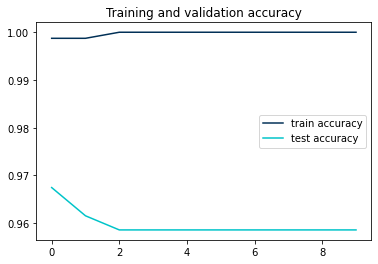

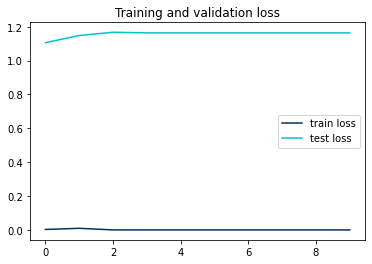

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

# Get number of epochs
epochs = range(len(acc3))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc3,label="train accuracy",color='#013056')
plt.plot(epochs, val_acc3,label="test accuracy",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss3,label="train loss",color='#013056')
plt.plot(epochs, val_loss3,label="test loss",color='#00c4c9')
plt.legend() #shows the box on the graph that has the line name and color
plt.title('Training and validation loss')

#checking the accuracy and loss
score = model3.evaluate(validation_generator, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Results of adding VGG: the first model's results went from over 90% to 49%,the second model stayed pretty much the same, and the last model did the best with over 95%.